In [9]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [10]:
#making sure GPU is in use 
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2539528681355095712
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11285289370
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5004271090125592662
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [20]:
# Set some parameters
in_height = 50
in_width = 50
out_height = 250
out_width = 250
color_dim = 3
path_in = '/home/Matthew/image-super-resolution/data/imagenet/res50/'
path_out = '/home/Matthew/image-super-resolution/data/imagenet/res250/'

In [84]:
def load_images(path_in,path_out):
    images = next(os.walk(path_in))[2] #oswalk is a generator 
    num_images = len(images)

    X = np.zeros((num_images,in_height,in_width,color_dim), dtype=np.float32)
    y = np.zeros((num_images,out_height,out_width,color_dim), dtype=np.float32)
    
    for idx, image in enumerate(images):
        image_in_path = os.path.join(path_in,image)
        image_out_path = os.path.join(path_out,image)

        image_in_raw =  load_img(image_in_path, grayscale=False)
        image_out_raw = load_img(image_out_path, grayscale=False)

        #converts image to keras preprocessing image, then divide by 255 to un-invert the images
        image_in = img_to_array(image_in_raw).squeeze() / 255 
        image_out = img_to_array(image_out_raw).squeeze() / 255          


        try:
            X[idx] = image_in
            y[idx] = image_out
        except:
            print(image_in_path)

        #X[idx] = image_in.ravel()
        #y[idx] = image_out.ravel()

        # Save images
        #X[idx, ..., 0] = image_in.squeeze() / 255 
        #y[idx, ..., 0] = image_out.squeeze() / 255
            
    return X,y

In [85]:
X, y = load_images(path_in, path_out)

In [49]:
#del X,y,X_train, X_valid, y_train, y_valid

In [50]:
X.shape

(40705, 50, 50, 3)

In [51]:
y.shape

(40705, 250, 250, 3)

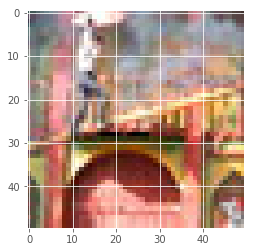

In [86]:
plt.imshow(X[8])
plt.show()

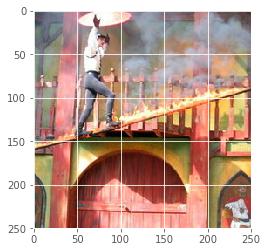

In [87]:
plt.imshow(y[8])
plt.show()

In [120]:
'''
N = len(X)
seed =42
split = 0.20
numOfSamples = int(split*N)

np.random.seed(seed=seed)
idx = np.random.permutation(X.shape[0])  # can also use random.shuffle

train_idx, test_idx = idx[:numOfSamples], idx[numOfSamples:]
#x_train, x_test, y_train, y_test = X[train_idx,:], X[test_idx,:], y[train_idx,], y[test_idx,]
'''

In [101]:
# Split train and valid
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
# Split y train and valid
#y_train, y_valid = train_test_split(y, test_size=0.20, random_state=42)

In [27]:
X_train.shape

(32564, 50, 50, 3)

In [28]:
X_valid.shape

(8141, 50, 50, 3)

In [29]:
y_train.shape

(32564, 250, 250, 3)

In [30]:
y_valid.shape

(8141, 250, 250, 3)